In [1]:
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
import seaborn as sn
import matplotlib.pyplot as plt
import ipywidgets as widgets

import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
import helper_functions as hf # library useful for eeg and erp data cleaning
import epod_helper

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow import keras
from tensorflow.keras import layers

2022-11-08 16:56:02.657756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 16:56:02.769668: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-08 16:56:02.798714: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-08 16:56:03.342781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
csv = widgets.RadioButtons(
    options=['df_mmr_ch_complete.csv', 'df_mmr_ch_literature.csv', 'df_mmr_ch_ttest.csv', 'df_mmr_ch_connectivity.csv'],
    description='Pick sensors',
    disabled=False
)
display(csv)

RadioButtons(description='Pick sensors', options=('df_mmr_ch_complete.csv', 'df_mmr_ch_literature.csv', 'df_mm…

In [3]:
csv = str(csv.value)
csv

'df_mmr_ch_complete.csv'

In [4]:
df = pd.read_csv(csv, sep = ',')

In [5]:
if csv=='df_mmr_ch_ttest.csv' or csv=='df_mmr_ch_connectivity.csv':
    df = df[30:]

In [6]:
def CNN(df, epochs, batch_size):
    # create tensor 
    target = df.pop('Group_AccToParents')
    tf.convert_to_tensor(df)
    
    # normalize data
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(df)
    
    # split data 
    X_train, X_test, y_train, y_test = train_test_split(df, target,test_size=0.2, random_state=42)
    
    # train model
    model = tf.keras.Sequential([
            normalizer,
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1)
          ])
    model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
                  metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    return

2022-11-08 16:56:36.768782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 16:56:36.799474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-08 16:56:36.799498: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-08 16:56:36.800465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

Epoch 1/50
40/40 [==============================] - 1s 5ms/step - loss: 0.8719 - accuracy: 0.5750 - val_loss: 0.7350 - val_accuracy: 0.4286
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6250 - val_loss: 0.7019 - val_accuracy: 0.4762
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6500 - val_loss: 0.6904 - val_accuracy: 0.4762
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.6750 - val_loss: 0.6901 - val_accuracy: 0.4762
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.6625 - val_loss: 0.6927 - val_accuracy: 0.4762
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.6625 - val_loss: 0.6902 - val_accuracy: 0.4762
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.6750 - val_loss: 0.6883 - val_accuracy: 0.4762
Epoch 8/50
40/40 [==

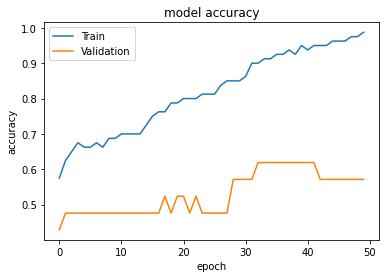

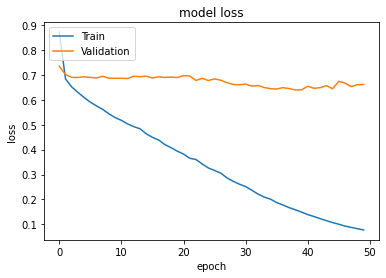

In [10]:
cnn = CNN(df, 50, 2)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(df, target,test_size=0.2, random_state=42)

In [10]:
def get_basic_model():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
      ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [ ]:
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=200, batch_size=2, validation_data=(X_test, y_test))

Epoch 1/200
28/28 [==============================] - 0s 5ms/step - loss: 0.7900 - accuracy: 0.4464 - val_loss: 0.8264 - val_accuracy: 0.3333
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7542 - accuracy: 0.5357 - val_loss: 0.8045 - val_accuracy: 0.4667
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.5536 - val_loss: 0.7872 - val_accuracy: 0.6667
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.5357 - val_loss: 0.7771 - val_accuracy: 0.7333
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5893 - val_loss: 0.7698 - val_accuracy: 0.7333
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6071 - val_loss: 0.7601 - val_accuracy: 0.7333
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5893 - val_loss: 0.7509 - val_accuracy: 0.6667
Epoch 8/200
2

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()